In [1]:
## import libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
## load data

path = 'data/Bobs_df_delivery.csv'
df = pd.read_csv(path)
df.head()


,pk_cid,pk_partition,country_id,region_code,gender,age,salary,short_term_deposit,loans,mortgage,...,entry_date,entry_channel,active_customer,Total_products,year_partition,month_partition,year_month_partition,quarter_entry,year_month_entry,salary_LN
0,1375586,2018-01-28,ES,Malaga,H,36,"87,218.10",0,0,0,...,2018-01-12,others,1,1,2018,1,2018-01,2018-Q1,2018-01,11.38
1,1050611,2018-01-28,ES,Ciudad Real,V,24,"35,548.74",0,0,0,...,2015-08-10,KHE,0,1,2018,1,2018-01,2015-Q3,2015-08,10.48
2,1050612,2018-01-28,ES,Ciudad Real,V,23,"122,179.11",0,0,0,...,2015-08-10,KHE,0,1,2018,1,2018-01,2015-Q3,2015-08,11.71
3,1050613,2018-01-28,ES,Zaragoza,H,23,"119,775.54",1,0,0,...,2015-08-10,KHD,0,1,2018,1,2018-01,2015-Q3,2015-08,11.69
4,1050614,2018-01-28,ES,Zaragoza,V,24,"89,257.08",0,0,0,...,2015-08-10,KHE,1,1,2018,1,2018-01,2015-Q3,2015-08,11.40


In [4]:
df.columns

Index(['pk_cid', 'pk_partition', 'country_id', 'region_code', 'gender', 'age',
       'salary', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_acount', 'entry_date', 'entry_channel', 'active_customer',
       'Total_products', 'year_partition', 'month_partition',
       'year_month_partition', 'quarter_entry', 'year_month_entry',
       'salary_LN'],
      dtype='object')

In [5]:
_features2drop = ['year_partition','month_partition','year_month_partition', 'quarter_entry', 'year_month_entry', 'Total_products','salary_LN']
df.drop(_features2drop, axis = 1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5926063 entries, 0 to 5926062
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   country_id          object 
 3   region_code         object 
 4   gender              object 
 5   age                 int64  
 6   salary              float64
 7   short_term_deposit  int64  
 8   loans               int64  
 9   mortgage            int64  
 10  funds               int64  
 11  securities          int64  
 12  long_term_deposit   int64  
 13  credit_card         int64  
 14  payroll             int64  
 15  pension_plan        int64  
 16  payroll_account     int64  
 17  emc_account         int64  
 18  debit_card          int64  
 19  em_acount           int64  
 20  entry_date          object 
 21  entry_channel       object 
 22  active_customer     int64  
dtypes: float64(1), int64(16), object(6)
memory usage: 1.0+ GB

In [7]:
df.columns

Index(['pk_cid', 'pk_partition', 'country_id', 'region_code', 'gender', 'age',
       'salary', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_acount', 'entry_date', 'entry_channel', 'active_customer'],
      dtype='object')

In [8]:
products = ['short_term_deposit', 'loans', 'mortgage', 'funds','securities', 'long_term_deposit', 'credit_card', 'payroll','pension_plan', 'payroll_account', 'emc_account', 'debit_card','em_acount']

In [9]:
df.set_index('pk_partition', inplace=True)

In [10]:
df.index.unique()

Index(['2018-01-28', '2018-02-28', '2018-03-28', '2018-04-28', '2018-05-28',
       '2018-06-28', '2018-07-28', '2018-08-28', '2018-09-28', '2018-10-28',
       '2018-11-28', '2018-12-28', '2019-01-28', '2019-02-28', '2019-03-28',
       '2019-04-28', '2019-05-28'],
      dtype='object', name='pk_partition')

In [11]:
df_last_month = df.copy()
partitions = df.index.unique()

for partition in partitions[:-1]:
    df_last_month.drop(partition,inplace=True)
    

In [12]:
df_nxt2last_month = df.copy()

for partition in partitions[:-2]:
    df_nxt2last_month.drop(partition,inplace=True)
df_nxt2last_month.drop(partitions[-1],inplace=True)    

In [13]:
print(df_last_month.index.unique())
print(df_nxt2last_month.index.unique())

Index(['2019-05-28'], dtype='object', name='pk_partition')
Index(['2019-04-28'], dtype='object', name='pk_partition')


## CLUSTERS

In [14]:
## AGE and PRODUCTS

df_last_month['age'].describe()

count   440,248.00
mean         30.55
std          12.14
min          18.00
25%          22.00
50%          25.00
75%          35.00
max         105.00
Name: age, dtype: float64

In [15]:
df_products_ages = pd.DataFrame(index=['u18','18-30','31-40','41-50','51-60','61-70','71-80','o80'], columns=products)

In [16]:
for prod in products:    
    df_products_ages.loc['u18',prod] = df[df['age']<18][prod].sum()
    df_products_ages.loc['18-30',prod] = df[(df['age']>18)&(df['age']<30)][prod].sum()
    df_products_ages.loc['31-40',prod] = df[(df['age']>30)&(df['age']<40)][prod].sum()
    df_products_ages.loc['41-50',prod] = df[(df['age']>40)&(df['age']<50)][prod].sum()
    df_products_ages.loc['51-60',prod] = df[(df['age']>50)&(df['age']<60)][prod].sum()
    df_products_ages.loc['61-70',prod] = df[(df['age']>60)&(df['age']<70)][prod].sum()
    df_products_ages.loc['71-80',prod] = df[(df['age']>70)&(df['age']<80)][prod].sum()
    df_products_ages.loc['o80',prod] = df[df['age']>80][prod].sum()

In [17]:
df_products_ages = df_products_ages.T
df_products_ages

,u18,18-30,31-40,41-50,51-60,61-70,71-80,o80
short_term_deposit,0,701,3961,4354,2308,1426,785,414
loans,0,154,139,46,41,0,0,0
mortgage,0,13,126,56,97,0,0,0
funds,0,1612,3815,4380,4381,2271,897,814
securities,0,2241,5538,5860,3573,1499,744,494
long_term_deposit,0,3746,15851,24378,20064,12570,7997,6348
credit_card,0,6236,23529,19544,9893,3430,996,260
payroll,0,47808,77692,37864,16647,4073,344,111
pension_plan,0,49832,78575,39214,17639,6400,1838,1681
payroll_account,0,86971,116278,56237,24358,8433,2554,2177


In [18]:
## Regions and products

df_products_region = pd.DataFrame(index=df['region_code'].unique(), columns=products)

In [19]:
df_products_region = df.groupby('region_code')[products].agg('sum').reset_index()
df_products_region

,region_code,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount
0,Alava,164,0,0,138,193,892,260,462,487,873,1994,1312,8325
1,Albacete,76,0,0,93,78,478,445,1455,1501,2337,1856,4805,61201
2,Alicante,398,0,0,386,682,2285,2171,7318,7656,12296,9161,22584,128412
3,Almeria,96,0,0,125,88,584,464,1897,1974,2938,2559,5244,21542
4,Asturias,338,0,0,332,550,1707,1032,3270,3357,5198,5662,10557,112910
5,Avila,38,0,0,0,58,327,134,495,577,968,1099,2163,16838
6,Badajoz,113,0,0,158,158,593,482,1627,1682,2729,2291,6127,103889
7,Baleares,216,0,0,239,273,804,1219,2785,2914,4359,3805,7369,43221
8,Barcelona,1342,34,29,1526,1737,7679,6602,17850,18551,28500,25389,39514,405059
9,Burgos,180,8,9,207,282,1106,572,1542,1662,2384,3204,4031,37725


In [20]:
## Active customer vs Products

In [21]:
df_last_month.loc[df_last_month['active_customer']==0,products].sum()

short_term_deposit         0
loans                      0
mortgage                   0
funds                      2
securities                 4
long_term_deposit          0
credit_card               22
payroll                   32
pension_plan              36
payroll_account          806
emc_account             2983
debit_card               194
em_acount             161691
dtype: int64

In [22]:
df_last_month.loc[df_last_month['active_customer']==1,products].sum()

short_term_deposit         2
loans                     30
mortgage                  23
funds                   1313
securities              1782
long_term_deposit       6119
credit_card             4779
payroll                16300
pension_plan           17289
payroll_account        25715
emc_account            21750
debit_card             43053
em_acount             134641
dtype: int64

In [23]:
# what does it make a customer non active?? They still have products

In [24]:
## Entry date

df['entry_date'].unique()

array(['2018-01-12', '2015-08-10', '2015-08-16', ..., '2019-05-25',
       '2019-05-01', '2019-05-15'], dtype=object)

In [25]:
# 2015-02-29
# This is completely wrong but it is a quick solution just to have a look
# pandas doesn't seem to ackowledge the existence of lap years with 29th of feb so it gives an error when converting it to datetime
# I will just transform it to 28th feb for this visualization

df.loc[df['entry_date']=='2015-02-29','entry_date'] = '2015-02-28'
df.loc[df['entry_date']=='2019-02-29','entry_date'] = '2019-02-28'

In [26]:
len(df['entry_date'].unique())

1456

In [27]:
df['entry_date'] = pd.to_datetime(df['entry_date'],format='%Y-%m-%d')
df_entry_dates = df.set_index('entry_date')

Text(0.5, 0.98, 'Monthly evolution of product features from Entry date')

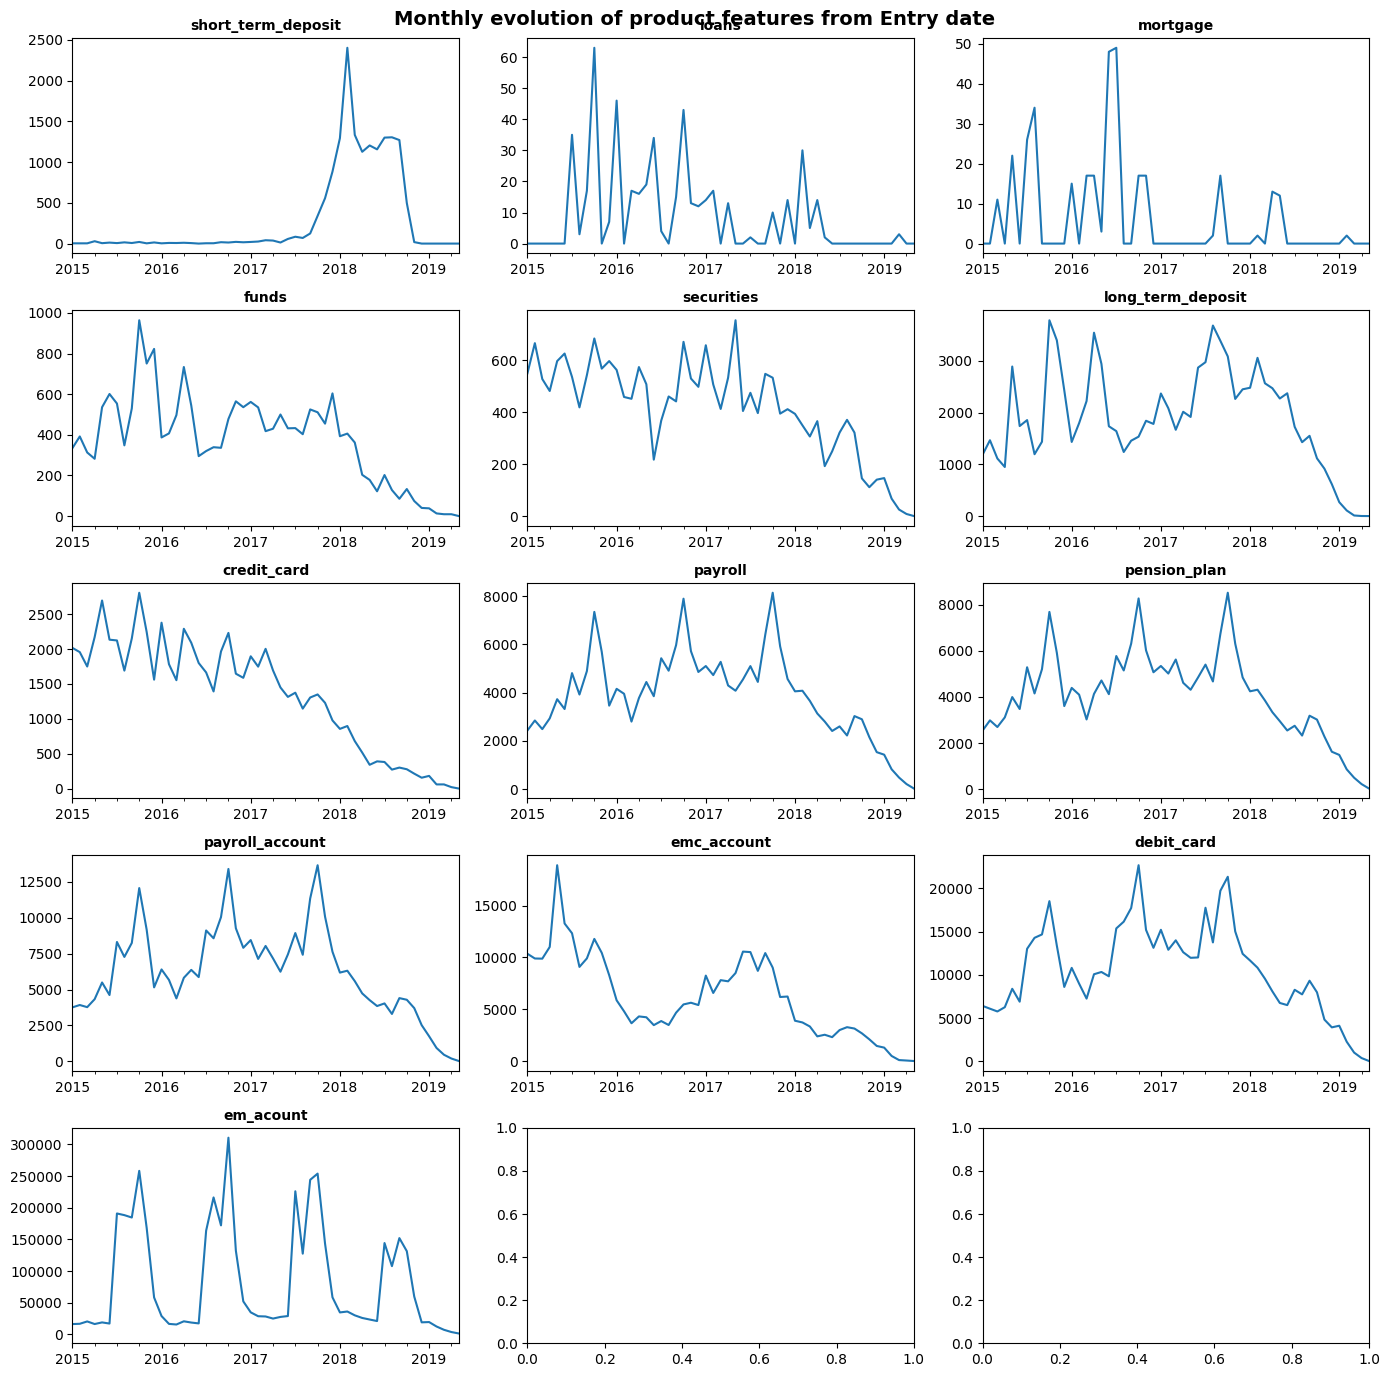

In [28]:
# THIS FIGURE IS WRONG, EXPLAINED LATER IN THE NOTEBOOK
#======================================================


# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14)) #  
axes = axes.flat

# plot
for i, col in enumerate(products):
    df_entry_dates.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Monthly evolution of product features from Entry date', fontsize = 14, fontweight = 'bold')

In [29]:
# confirmation no duplicates in above plots

# 1. Actual numbers in the plot
df_entry_dates.resample('M')[col].sum()

entry_date
2015-01-31     16375
2015-02-28     16837
2015-03-31     20526
2015-04-30     16436
2015-05-31     19008
2015-06-30     17204
2015-07-31    191032
2015-08-31    188403
2015-09-30    184641
2015-10-31    258326
2015-11-30    168313
2015-12-31     58398
2016-01-31     29045
2016-02-29     16674
2016-03-31     15697
2016-04-30     20752
2016-05-31     18790
2016-06-30     17439
2016-07-31    163829
2016-08-31    216357
2016-09-30    172218
2016-10-31    310691
2016-11-30    132282
2016-12-31     52217
2017-01-31     34897
2017-02-28     28771
2017-03-31     28376
2017-04-30     25074
2017-05-31     27671
2017-06-30     29055
2017-07-31    226069
2017-08-31    127582
2017-09-30    244163
2017-10-31    253970
2017-11-30    143385
2017-12-31     58593
2018-01-31     34776
2018-02-28     36208
2018-03-31     30176
2018-04-30     26042
2018-05-31     23567
2018-06-30     21164
2018-07-31    144349
2018-08-31    107856
2018-09-30    152131
2018-10-31    131503
2018-11-30     59832
20

In [30]:
df_test = df.copy()
df_test.drop_duplicates(subset='pk_cid', inplace=True)

In [31]:
# 2. People which entry date is any day in may and they have em_acount, should match the last number in above series

count = 0
for i in range(len(df_test)):
    if ('2019-05' in str(df_test.iloc[i,15]))&(df_test.iloc[i,14]==1):
        count += 1

count

0

In [32]:
## confirm that monthly evolution and products selling match
# something is off

In [33]:
df.head()

,pk_cid,country_id,region_code,gender,age,salary,short_term_deposit,loans,mortgage,funds,...,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount,entry_date,entry_channel,active_customer
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1375586,ES,Malaga,H,36,"87,218.10",0,0,0,0,...,0,0,0,0,0,0,1,2018-01-12,others,1
2018-01-28,1050611,ES,Ciudad Real,V,24,"35,548.74",0,0,0,0,...,0,0,0,0,0,0,1,2015-08-10,KHE,0
2018-01-28,1050612,ES,Ciudad Real,V,23,"122,179.11",0,0,0,0,...,0,0,0,0,0,0,1,2015-08-10,KHE,0
2018-01-28,1050613,ES,Zaragoza,H,23,"119,775.54",1,0,0,0,...,0,0,0,0,0,0,0,2015-08-10,KHD,0
2018-01-28,1050614,ES,Zaragoza,V,24,"89,257.08",0,0,0,0,...,0,0,0,0,0,0,1,2015-08-10,KHE,1


In [34]:
products_df = df[products].copy()

In [35]:
products_df = pd.concat([df['pk_cid'],products_df], axis=1)

In [36]:
products_df.head()

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount
pk_partition,,,,,,,,,,,,,,
2018-01-28,1375586,0,0,0,0,0,0,0,0,0,0,0,0,1
2018-01-28,1050611,0,0,0,0,0,0,0,0,0,0,0,0,1
2018-01-28,1050612,0,0,0,0,0,0,0,0,0,0,0,0,1
2018-01-28,1050613,1,0,0,0,0,0,0,0,0,0,0,0,0
2018-01-28,1050614,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
products_df.shape

(5926063, 14)

In [38]:
products_df.reset_index(inplace=True)

In [39]:
products_df.head()

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount
0,2018-01-28,1375586,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2018-01-28,1050611,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2018-01-28,1050612,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2018-01-28,1050613,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-01-28,1050614,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
products_df['pk_partition'] = pd.to_datetime(products_df['pk_partition'], format='%Y-%m-%d')
products_df = products_df.set_index('pk_partition')


In [41]:
products

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_acount']

Text(0.5, 0.98, 'Monthly evolution of product features')

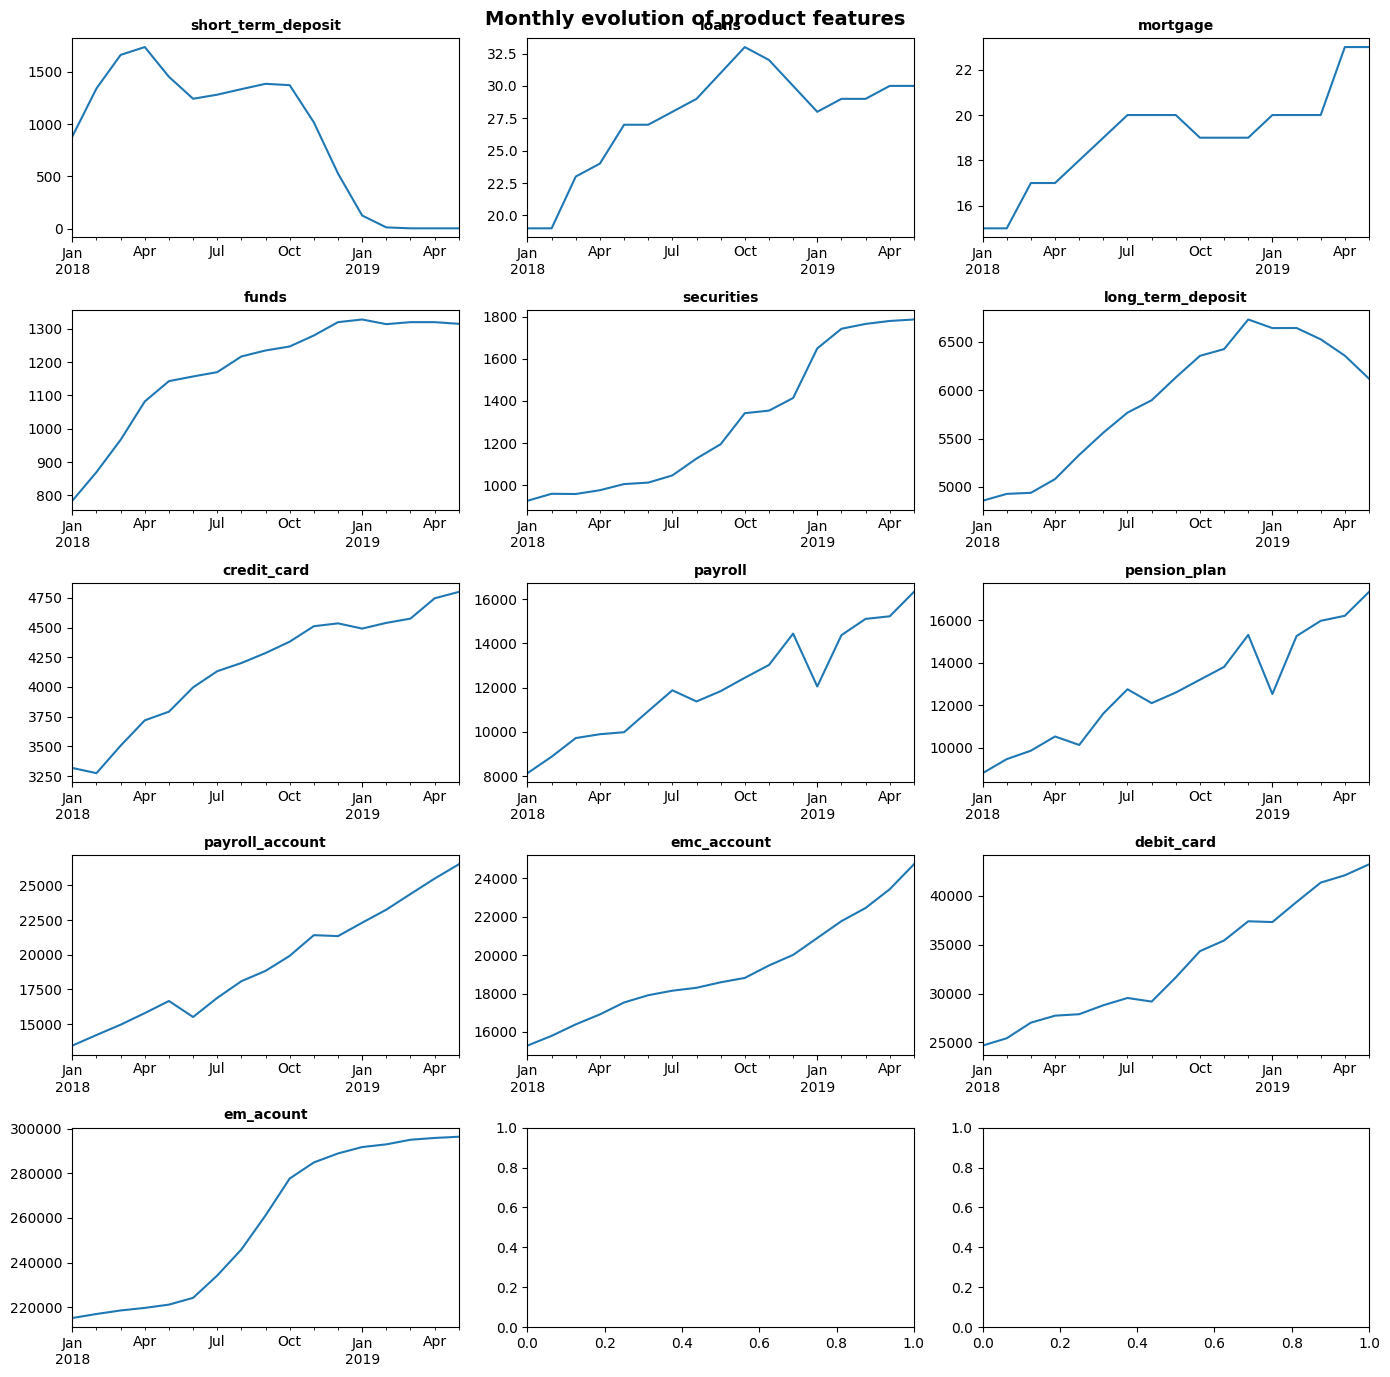

In [42]:
# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14)) #  
axes = axes.flat

# plot
for i, col in enumerate(products):
    products_df.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Monthly evolution of product features', fontsize = 14, fontweight = 'bold')

In [43]:
products_df.reset_index(inplace=True)

In [44]:
# partitions happen always on the 28th of each month

In [45]:
df.reset_index(inplace=True)

In [46]:
df.head()

,pk_partition,pk_cid,country_id,region_code,gender,age,salary,short_term_deposit,loans,mortgage,...,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount,entry_date,entry_channel,active_customer
0,2018-01-28,1375586,ES,Malaga,H,36,"87,218.10",0,0,0,...,0,0,0,0,0,0,1,2018-01-12,others,1
1,2018-01-28,1050611,ES,Ciudad Real,V,24,"35,548.74",0,0,0,...,0,0,0,0,0,0,1,2015-08-10,KHE,0
2,2018-01-28,1050612,ES,Ciudad Real,V,23,"122,179.11",0,0,0,...,0,0,0,0,0,0,1,2015-08-10,KHE,0
3,2018-01-28,1050613,ES,Zaragoza,H,23,"119,775.54",1,0,0,...,0,0,0,0,0,0,0,2015-08-10,KHD,0
4,2018-01-28,1050614,ES,Zaragoza,V,24,"89,257.08",0,0,0,...,0,0,0,0,0,0,1,2015-08-10,KHE,1


In [47]:
## Best client

# longest period being active
# number of products
# revenue of those products
#==============================
# VARIABLES

# clients_id: distinct customer ids
# active_id: distinct customer ids active last month
# non_active_id: distinct customer ids non active last month
# active: df with all partitions of customers in active_id
# non_active: df with all partitions of customers in non_active_id
# rank_active_df: rank active customers in terms of revenue

In [48]:
# number of distinct customer ids:
clients_id = df['pk_cid'].unique()
len(clients_id)

453538

In [49]:
df['pk_partition'].unique()

array(['2018-01-28', '2018-02-28', '2018-03-28', '2018-04-28',
       '2018-05-28', '2018-06-28', '2018-07-28', '2018-08-28',
       '2018-09-28', '2018-10-28', '2018-11-28', '2018-12-28',
       '2019-01-28', '2019-02-28', '2019-03-28', '2019-04-28',
       '2019-05-28'], dtype=object)

In [50]:
# divide between active and non-active, based on last month

active = pd.DataFrame()
active_id = list(df.loc[(df['active_customer']==1)&(df['pk_partition']=='2019-05-28'),'pk_cid'])
active_id[:5]

[657826, 657986, 657905, 657336, 658184]

In [51]:
len(active_id)

169374

In [52]:
len(set(active_id))

169374

In [53]:
active = df.loc[df['pk_cid'].isin(active_id)]

print(len(active['pk_cid'].unique()))
print(len(active_id))

169374
169374


In [54]:
active.columns

Index(['pk_partition', 'pk_cid', 'country_id', 'region_code', 'gender', 'age',
       'salary', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_acount', 'entry_date', 'entry_channel', 'active_customer'],
      dtype='object')

In [55]:
active = pd.concat([active[['pk_partition','pk_cid']],active[products],active['active_customer']],axis=1)
# only the products and if they are active customers in a given partition

In [56]:
active.head()


,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount,active_customer
0,2018-01-28,1375586,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,2018-01-28,1050614,0,0,0,0,0,0,0,0,0,0,0,0,1,1
7,2018-01-28,1050617,0,0,0,0,0,0,0,0,0,0,0,0,1,1
12,2018-01-28,1050623,0,0,0,0,0,0,0,0,0,0,0,0,1,1
14,2018-01-28,1050625,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [57]:
# Remove last month from the data, it will be our target so we cannot use it for predicting anything
active = active[active.pk_partition != '2019-05-28']

In [58]:
active.shape

(2143910, 16)

In [59]:
## Now let's rank the customers in terms of the total revenue they gave to the company
rank_active_df = pd.DataFrame(index=active_id, columns=['revenue','months'])
# revenue = total revenue over time from this person: each month prduct x revenue, sum
# months = number of months the client has been a client (active/non active)
# active = is it active in the final partition?

In [60]:
rank_active_df.shape

(169374, 2)

In [61]:
rank_active_df.head()

,revenue,months
657826,NaN,NaN
657986,NaN,NaN
657905,NaN,NaN
657336,NaN,NaN
658184,NaN,NaN


In [62]:
active.columns

Index(['pk_partition', 'pk_cid', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_acount', 'active_customer'],
      dtype='object')

In [63]:
revenues_list = [1,1,40,60,60,40,40,40,60,10,40,0,10,60,10,1]
# it has same order as the products in the df

In [64]:
active = active*revenues_list
active.head()

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount,active_customer
0,2018-01-28,1375586,0,0,0,0,0,0,0,0,0,0,0,0,10,1
4,2018-01-28,1050614,0,0,0,0,0,0,0,0,0,0,0,0,10,1
7,2018-01-28,1050617,0,0,0,0,0,0,0,0,0,0,0,0,10,1
12,2018-01-28,1050623,0,0,0,0,0,0,0,0,0,0,0,0,10,1
14,2018-01-28,1050625,0,0,0,0,0,0,0,0,0,0,0,0,10,1


In [65]:
active.loc[:,'sum'] = active[products].sum(axis=1)

In [66]:
active.head()

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount,active_customer,sum
0,2018-01-28,1375586,0,0,0,0,0,0,0,0,0,0,0,0,10,1,10
4,2018-01-28,1050614,0,0,0,0,0,0,0,0,0,0,0,0,10,1,10
7,2018-01-28,1050617,0,0,0,0,0,0,0,0,0,0,0,0,10,1,10
12,2018-01-28,1050623,0,0,0,0,0,0,0,0,0,0,0,0,10,1,10
14,2018-01-28,1050625,0,0,0,0,0,0,0,0,0,0,0,0,10,1,10


In [67]:
# since in the end we are assuming that active only means that it is active in the app, in during a given month it has no activity but it has products, easymoney is still getting revenue
# so the multiplication by 1 or 0 if active or not is not needed anymore

# active.loc[:,'revenue'] = active.loc[:,'sum']*active.loc[:,'active_customer']

In [68]:
# for id in active_id:
#     rank_active_df.loc[id,'revenue'] = active.loc[active['pk_cid']==id,'sum'].sum()
#     rank_active_df.loc[id,'months'] = active.loc[active['pk_cid']==id,'active_customer'].sum()

rank_active_df = active.groupby('pk_cid').agg({'sum': 'sum', 'active_customer': 'sum'})
rank_active_df.columns = ['revenue', 'months']

# rank_active_df = rank_active_df.merge(active_grouped, how='left', left_index=True, right_index=True)

rank_active_df.to_csv('rank_active_df.csv')

# it takes super long to run above for look, I have saved as rank_active_df.csv in the same folder

In [69]:
rank_active_df = pd.read_csv('rank_active_df.csv',index_col=0)

In [70]:
rank_active_df.head()

,revenue,months
pk_cid,,
16203,40,4
16502,110,7
17457,1000,16
17590,0,10
17799,160,16


In [71]:
rank_active_df.sort_values(by='revenue', ascending=False,inplace=True)
rank_active_df

,revenue,months
pk_cid,,
1128353,4580,16
1116675,4560,16
1136671,4420,16
1070525,4200,16
1133500,4160,16
...,...,...
1011642,0,5
1543047,0,1
1524659,0,3


In [72]:
active.head()

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_acount,active_customer,sum
0,2018-01-28,1375586,0,0,0,0,0,0,0,0,0,0,0,0,10,1,10
4,2018-01-28,1050614,0,0,0,0,0,0,0,0,0,0,0,0,10,1,10
7,2018-01-28,1050617,0,0,0,0,0,0,0,0,0,0,0,0,10,1,10
12,2018-01-28,1050623,0,0,0,0,0,0,0,0,0,0,0,0,10,1,10
14,2018-01-28,1050625,0,0,0,0,0,0,0,0,0,0,0,0,10,1,10


In [73]:
rank_active_df = rank_active_df.astype('int')

In [74]:
rank_active_df.describe()

,revenue,months
count,"167,912.00","167,912.00"
mean,406.84,12.03
std,496.39,5.09
min,0.00,0.00
25%,110.00,8.00
50%,160.00,16.00
75%,550.00,16.00
max,"4,580.00",16.00


In [75]:
# mean revenue is higher than the median revenue, which means that the top percentage of clients yield a lot of money while there are many that mean 0€ even though they are active
# for the months is the opposte, the median is 17 months, meaning half of the customers stay active for 17 months, while the mean stay is 13 months

In [76]:
rank_active_df[rank_active_df['revenue']==0]

,revenue,months
pk_cid,,
1124887,0,10
1545645,0,0
1166287,0,16
1545359,0,0
1545637,0,0
...,...,...
1011642,0,5
1543047,0,1
1524659,0,3


In [77]:
rank_active_df[rank_active_df['revenue']<=20]

,revenue,months
pk_cid,,
1536288,20,2
1536296,20,2
1534039,20,2
1522485,20,2
1536278,20,2
...,...,...
1011642,0,5
1543047,0,1
1524659,0,3


In [78]:
unique_ids = len(df['pk_cid'].unique())
unique_active_ids = len(df.loc[(df['active_customer']==1)&(df['pk_partition']=='2019-05-28'),'pk_cid'].unique())
print(f"Number of unique customers: {unique_ids}")
print(f"Number of unique active customers last month: {unique_active_ids}")

Number of unique customers: 453538
Number of unique active customers last month: 169374


In [79]:
# one person of these 4882 customers that is active on the last month, like tje 3489 above, might hava had activity on other months and therefore he/she won't appear in the above selection.
# that's why the numbers don't match.

len(df.loc[(df['active_customer']==1) & \
           (df['pk_partition']=='2019-05-28') & \
           (df['short_term_deposit']==0) & \
           (df['loans']==0) & \
           (df['mortgage']==0) & \
           (df['funds']==0) & \
           (df['securities']==0) & \
           (df['long_term_deposit']==0) & \
           (df['credit_card']==0) & \
           (df['debit_card']==0) & \
           (df['payroll']==0) & \
           (df['pension_plan']==0) & \
           (df['payroll_account']==0) & \
           (df['emc_account']==0) & \
           (df['em_acount']==0)\
           ,'pk_cid'].unique())

2769

In [80]:
# customers that are curetntly considered active, that most of them have been active for a while and which have zero to one product (account) so the revenues are pretty low
# the 309 missing can be from the ones with revenue == 30, the ones that have been longer as active customers might be more likely to buy as they show more interest on the company

In [81]:
# Now, which products do we recommend to these people??
# let's see which products do they have first
# we have basically 4 groups, all based on revenue: 0, 10, 20, 30.

In [82]:
products

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_acount']

In [84]:
def get_products(row):
    result = []
    index = row['pk_cid']
    for p in products:
        if row[p]==1:
            result.append(p)
    return [result,index]

In [85]:
products_per_customer = df.loc[(df['active_customer']==1)&(df['pk_partition']=='2019-05-28')].apply(get_products, axis=1)    

In [86]:
products_per_customer = products_per_customer.apply(pd.Series)
products_per_customer.columns = ['products', 'id']
products_per_customer.head()

,products,id
5485815,[em_acount],657826
5485817,"[credit_card, payroll, pension_plan, payroll_a...",657986
5485818,"[long_term_deposit, em_acount]",657905
5485819,[em_acount],657336
5485821,"[credit_card, payroll, pension_plan, payroll_a...",658184


In [87]:
products_per_customer.shape

(169374, 2)

In [88]:
products_per_customer.set_index('id', inplace=True)

In [103]:
len(products_per_customer)

169374

In [90]:
rank_active_df = pd.merge(rank_active_df, products_per_customer, how='left', left_index=True, right_index=True)

In [96]:
rank_active_df

,revenue,months,products,products_str
pk_cid,,,,
1128353,4580,16,"[funds, securities, long_term_deposit, credit_...",funds securities long_term_deposit credit_card...
1116675,4560,16,"[funds, securities, credit_card, pension_plan,...",funds securities credit_card pension_plan payr...
1136671,4420,16,"[funds, securities, credit_card, payroll, pens...",funds securities credit_card payroll pension_p...
1070525,4200,16,"[funds, securities, long_term_deposit, payroll...",funds securities long_term_deposit payroll pen...
1133500,4160,16,"[funds, securities, credit_card, payroll, pens...",funds securities credit_card payroll pension_p...
...,...,...,...,...
1011642,0,5,[],
1543047,0,1,[],
1524659,0,3,[emc_account],emc_account


In [105]:
rank_active_df.loc[rank_active_df['revenue']==10,'products'].value_counts()

[em_acount]                                                          1896
[]                                                                    389
[debit_card, em_acount]                                               262
[emc_account]                                                         191
[payroll_account]                                                     100
[payroll, pension_plan, payroll_account]                               56
[emc_account, em_acount]                                               28
[payroll, pension_plan, em_acount]                                     22
[payroll_account, emc_account]                                         15
[payroll, pension_plan, payroll_account, debit_card]                   15
[payroll, pension_plan, debit_card, em_acount]                         10
[emc_account, debit_card, em_acount]                                    7
[payroll_account, debit_card]                                           6
[securities, em_acount]               

In [106]:
rank_active_df.loc[rank_active_df['revenue']==20,'products'].value_counts()

[em_acount]                                                        2362
[debit_card, em_acount]                                             200
[emc_account]                                                       136
[]                                                                  117
[emc_account, em_acount]                                             64
[payroll, pension_plan, payroll_account]                             52
[payroll_account]                                                    43
[payroll, pension_plan, em_acount]                                   12
[payroll_account, emc_account]                                       11
[payroll, pension_plan, payroll_account, debit_card]                 10
[emc_account, debit_card, em_acount]                                  7
[credit_card, em_acount]                                              4
[payroll, pension_plan, debit_card, em_acount]                        3
[funds, em_acount]                                              

In [107]:
rank_active_df.loc[rank_active_df['revenue']==30,'products'].value_counts()

[em_acount]                                              1760
[emc_account, em_acount]                                  184
[debit_card, em_acount]                                   127
[emc_account]                                             105
[]                                                         78
[payroll_account]                                          26
[payroll_account, emc_account]                             18
[payroll, pension_plan, payroll_account]                   17
[payroll, pension_plan, em_acount]                         10
[emc_account, debit_card, em_acount]                       10
[credit_card, em_acount]                                    6
[payroll, pension_plan, emc_account, em_acount]             4
[credit_card, emc_account, em_acount]                       2
[emc_account, debit_card]                                   2
[payroll, pension_plan, payroll_account, debit_card]        2
[pension_plan, em_acount]                                   1
[securit

In [108]:
rank_active_df.loc[rank_active_df['revenue']<=30,'products'].value_counts()

[em_acount]                                                          6884
[]                                                                   1759
[debit_card, em_acount]                                               658
[emc_account]                                                         573
[payroll_account]                                                     416
[emc_account, em_acount]                                              291
[payroll, pension_plan, payroll_account]                              159
[payroll, pension_plan, em_acount]                                     78
[payroll_account, emc_account]                                         53
[payroll, pension_plan, payroll_account, debit_card]                   38
[emc_account, debit_card, em_acount]                                   25
[payroll_account, debit_card]                                          17
[payroll, pension_plan, debit_card, em_acount]                         15
[credit_card, em_acount]              

In [94]:
# transform the list into a string so I can select the nans (empty strings of the customers that have no product) as empty strings 
rank_active_df['products_str'] = rank_active_df['products'].apply(lambda s: ' '.join(map(str, s)))

In [95]:
rank_active_df

,revenue,months,products,products_str
pk_cid,,,,
1128353,4580,16,"[funds, securities, long_term_deposit, credit_...",funds securities long_term_deposit credit_card...
1116675,4560,16,"[funds, securities, credit_card, pension_plan,...",funds securities credit_card pension_plan payr...
1136671,4420,16,"[funds, securities, credit_card, payroll, pens...",funds securities credit_card payroll pension_p...
1070525,4200,16,"[funds, securities, long_term_deposit, payroll...",funds securities long_term_deposit payroll pen...
1133500,4160,16,"[funds, securities, credit_card, payroll, pens...",funds securities credit_card payroll pension_p...
...,...,...,...,...
1011642,0,5,[],
1543047,0,1,[],
1524659,0,3,[emc_account],emc_account


In [116]:
rank_active_df['products'].dtypes

dtype('O')

In [110]:
rank_active_df.head()

,revenue,months,products,products_str
pk_cid,,,,
1128353,4580,16,"[funds, securities, long_term_deposit, credit_...",funds securities long_term_deposit credit_card...
1116675,4560,16,"[funds, securities, credit_card, pension_plan,...",funds securities credit_card pension_plan payr...
1136671,4420,16,"[funds, securities, credit_card, payroll, pens...",funds securities credit_card payroll pension_p...
1070525,4200,16,"[funds, securities, long_term_deposit, payroll...",funds securities long_term_deposit payroll pen...
1133500,4160,16,"[funds, securities, credit_card, payroll, pens...",funds securities credit_card payroll pension_p...


In [380]:
sum(rank_active_df['products_str'] == '')

# it's 4733 because there are clients with all sorts of revenues that have no products during last month

4733

In [381]:
rank_active_df.loc[rank_active_df['products_str']== '','revenue'].value_counts()

0       3246
10       389
20       117
30        78
160       66
        ... 
1080       1
1170       1
1180       1
1210       1
650        1
Name: revenue, Length: 126, dtype: int64

# Conclusion

So we can basically offer:
- 4735 em accounts to customers that have been recently active. It is the most engaging product, offer them to customers that even though they are active now, have no products (some of them had products in the past).
    - Customers with all sort of revenue values.
- 1896 debit card to customers which revenue has been 10 over time and have already em account
- 2362 debit card to customers which revenue has been 20 over time and have already em account
- 1007 debit card to customers which revenue has been 30 over time and have already em account (out of 1760). Order by months of activity.

As a reminder: these customers have been active last month

This is the cheapest and simplest of the manual models and it is focused on engaging customers.


In [ ]:
## preparation of dataset for ML approach

In [382]:
rank_active_df

,revenue,months,products,products_str
pk_cid,,,,
1128353,4580,16,"[funds, securities, long_term_deposit, credit_...",funds securities long_term_deposit credit_card...
1116675,4560,16,"[funds, securities, credit_card, pension_plan,...",funds securities credit_card pension_plan payr...
1136671,4420,16,"[funds, securities, credit_card, payroll, pens...",funds securities credit_card payroll pension_p...
1070525,4200,16,"[funds, securities, long_term_deposit, payroll...",funds securities long_term_deposit payroll pen...
1133500,4160,16,"[funds, securities, credit_card, payroll, pens...",funds securities credit_card payroll pension_p...
...,...,...,...,...
1012981,0,16,[],
1387697,0,3,[emc_account],emc_account
1387693,0,14,[],


In [383]:
_aux_feats = ['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds','securities', 'long_term_deposit', 'credit_card', 'debit_card','payroll', 'pension_plan', 'payroll_account', 'emc_account', 'em_acount']
_aux_feats

['pk_cid',
 'short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'credit_card',
 'debit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'em_acount']

In [384]:
products_profile_last_month = df.loc[(df['pk_partition']=='2019-05-28') & (df['active_customer']==1),_aux_feats]

In [385]:
products_profile_last_month.set_index('pk_cid', inplace=True)
products_profile_last_month.head()

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,payroll,pension_plan,payroll_account,emc_account,em_acount
pk_cid,,,,,,,,,,,,,
657826,0,0,0,0,0,0,0,0,0,0,0,0,1
657986,0,0,0,0,0,0,1,1,1,1,1,1,0
657905,0,0,0,0,0,1,0,0,0,0,0,0,1
657336,0,0,0,0,0,0,0,0,0,0,0,0,1
658184,0,0,0,0,0,0,1,1,1,1,1,1,0


In [386]:
model_proba_df = pd.merge(rank_active_df, products_profile_last_month, left_index=True, right_index=True)

In [387]:
model_proba_df.drop('products', axis=1, inplace=True)
model_proba_df.drop('products_str', axis=1, inplace=True)

In [388]:
model_proba_df.head()

,revenue,months,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,payroll,pension_plan,payroll_account,emc_account,em_acount
pk_cid,,,,,,,,,,,,,,,
1128353,4580,16,0,0,0,1,1,1,1,1,1,1,1,1,0
1116675,4560,16,0,0,0,1,1,0,1,1,0,1,1,0,1
1136671,4420,16,0,0,0,1,1,0,1,1,1,1,1,0,0
1070525,4200,16,0,0,0,1,1,1,0,1,1,1,1,1,0
1133500,4160,16,0,0,0,1,1,0,1,1,1,1,1,1,0


In [389]:
model_proba_df.loc[model_proba_df['revenue']==0]

,revenue,months,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,payroll,pension_plan,payroll_account,emc_account,em_acount
pk_cid,,,,,,,,,,,,,,,
1547114,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
1514229,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0
356053,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0
1547385,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
368411,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012981,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0
1387697,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0
1387693,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0


In [390]:
len(model_proba_df.index)

170017

In [391]:
# I am going to add the age categories I had calculated above just to have a bit more from were to get patterns

df['age_cat'] = pd.cut(x=df['age_corrected'], bins=[0,18,30,40,50,60,70,80,110], labels=['u18','18-30','31-40','41-50','51-60','61-70','71-80','o80'])
df.head()

,pk_partition,pk_cid,country_id,region_code,gender,salary,short_term_deposit,loans,mortgage,funds,...,pension_plan,payroll_account,emc_account,debit_card,em_acount,entry_date,entry_channel,active_customer,age_corrected,age_cat
0,2018-01-28,1375586,ES,Malaga,H,"87,218.10",0,0,0,0,...,0,0,0,0,1,2018-01-12,others,1,36,31-40
1,2018-01-28,1050611,ES,Ciudad Real,V,"35,548.74",0,0,0,0,...,0,0,0,0,1,2015-08-10,KHE,0,24,18-30
2,2018-01-28,1050612,ES,Ciudad Real,V,"122,179.11",0,0,0,0,...,0,0,0,0,1,2015-08-10,KHE,0,23,18-30
3,2018-01-28,1050613,ES,Zaragoza,H,"119,775.54",1,0,0,0,...,0,0,0,0,0,2015-08-10,KHD,0,23,18-30
4,2018-01-28,1050614,ES,Zaragoza,V,"89,371.62",0,0,0,0,...,0,0,0,0,1,2015-08-10,KHE,1,24,18-30


In [392]:
model_proba_df.shape

(170017, 15)

In [393]:
_aux_age = df.loc[df['pk_partition']=='2019-05-28',['pk_cid','age_cat']]
_aux_age.set_index('pk_cid', inplace=True)
_aux_age = _aux_age.loc[list(rank_active_df.index)]
model_proba_df = model_proba_df.join(_aux_age)
model_proba_df.shape

(170017, 16)

In [394]:
model_proba_df.head()

,revenue,months,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,payroll,pension_plan,payroll_account,emc_account,em_acount,age_cat
pk_cid,,,,,,,,,,,,,,,,
1128353,4580,16,0,0,0,1,1,1,1,1,1,1,1,1,0,51-60
1116675,4560,16,0,0,0,1,1,0,1,1,0,1,1,0,1,61-70
1136671,4420,16,0,0,0,1,1,0,1,1,1,1,1,0,0,41-50
1070525,4200,16,0,0,0,1,1,1,0,1,1,1,1,1,0,41-50
1133500,4160,16,0,0,0,1,1,0,1,1,1,1,1,1,0,31-40


In [395]:
# one hot encode the age categories
_dummy_df = pd.get_dummies(model_proba_df['age_cat'], prefix='age')
model_proba_df = pd.concat([model_proba_df,_dummy_df],axis=1)
model_proba_df.drop('age_cat', axis=1, inplace=True)
model_proba_df.head()


,revenue,months,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,...,emc_account,em_acount,age_u18,age_18-30,age_31-40,age_41-50,age_51-60,age_61-70,age_71-80,age_o80
pk_cid,,,,,,,,,,,,,,,,,,,,,
1128353,4580,16,0,0,0,1,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
1116675,4560,16,0,0,0,1,1,0,1,1,...,0,1,0,0,0,0,0,1,0,0
1136671,4420,16,0,0,0,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1070525,4200,16,0,0,0,1,1,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1133500,4160,16,0,0,0,1,1,0,1,1,...,1,0,0,0,1,0,0,0,0,0


In [396]:
rank_active_df

,revenue,months,products,products_str
pk_cid,,,,
1128353,4580,16,"[funds, securities, long_term_deposit, credit_...",funds securities long_term_deposit credit_card...
1116675,4560,16,"[funds, securities, credit_card, pension_plan,...",funds securities credit_card pension_plan payr...
1136671,4420,16,"[funds, securities, credit_card, payroll, pens...",funds securities credit_card payroll pension_p...
1070525,4200,16,"[funds, securities, long_term_deposit, payroll...",funds securities long_term_deposit payroll pen...
1133500,4160,16,"[funds, securities, credit_card, payroll, pens...",funds securities credit_card payroll pension_p...
...,...,...,...,...
1012981,0,16,[],
1387697,0,3,[emc_account],emc_account
1387693,0,14,[],


In [397]:
# remove the 10k customers from the dataset so it can be used as "new data" once the model is validated

_index_10k = list(rank_active_df.loc[rank_active_df['products_str']==''].index)
len(_index_10k)

4733

In [398]:
_index_10k.extend(list(rank_active_df.loc[(rank_active_df['revenue']==10) & (rank_active_df['products_str']=='em_acount')].index))

In [399]:
len(_index_10k)

6629

In [400]:
_index_10k.extend(list(rank_active_df.loc[(rank_active_df['revenue']==20) & (rank_active_df['products_str']=='em_acount')].index))

In [401]:
len(_index_10k)

8991

In [402]:
_index_10k.extend(list(rank_active_df.loc[(rank_active_df['revenue']==30) & (rank_active_df['products_str']=='em_acount')].index)[:1009])

In [403]:
len(_index_10k)

10000

In [404]:
final_10k = model_proba_df.loc[_index_10k]

In [405]:
final_10k

,revenue,months,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,...,emc_account,em_acount,age_u18,age_18-30,age_31-40,age_41-50,age_51-60,age_61-70,age_71-80,age_o80
pk_cid,,,,,,,,,,,,,,,,,,,,,
1045535,2430,15,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1116106,2260,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1020461,2260,16,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1119050,2030,16,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1209899,1950,16,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530058,30,3,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1530046,30,3,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1530044,30,3,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [406]:
model_proba_df.drop(_index_10k, inplace=True)
model_proba_df

,revenue,months,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,...,emc_account,em_acount,age_u18,age_18-30,age_31-40,age_41-50,age_51-60,age_61-70,age_71-80,age_o80
pk_cid,,,,,,,,,,,,,,,,,,,,,
1128353,4580,16,0,0,0,1,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
1116675,4560,16,0,0,0,1,1,0,1,1,...,0,1,0,0,0,0,0,1,0,0
1136671,4420,16,0,0,0,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1070525,4200,16,0,0,0,1,1,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1133500,4160,16,0,0,0,1,1,0,1,1,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535868,0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1388718,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1388325,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [407]:
final_10k.to_csv('final_10k.csv')

In [408]:
model_proba_df.to_csv('model_proba_df.csv')

# FROM HERE I HAVEN'T RERUN SINCE THE DF FROM DAVID SO IF NEED ANYTHING IT MIGHT GIVE AN ERROR, WILL HAVE TO CHECK

In [ ]:
# Statistics of months active of these groups

In [226]:
rank_active_df.loc[rank_active_df['revenue']<=20,'months'].value_counts()

1.00     3143
2.00     2856
17.00    1607
3.00      530
4.00      356
5.00      294
6.00      181
11.00     150
7.00       89
8.00       80
10.00      75
13.00      67
9.00       65
14.00      52
16.00      51
15.00      48
12.00      47
Name: months, dtype: int64

In [ ]:
# could add a label feature diving the clients

In [ ]:
## Non active customers 

In [ ]:
non_active = pd.DataFrame()
non_active_id = list(df.loc[(df['active_customer']==0)&(df['pk_partition']=='2019-05-28'),'pk_cid'])

non_active = df.loc[df['pk_cid'].isin(non_active_id)]
non_active = pd.concat([non_active.iloc[:,:16],non_active['active_customer']],axis=1)
print(len(non_active['pk_cid'].unique()))
print(len(non_active_id))

271427
271427


In [ ]:
# think how to deal non_active clients

In [ ]:
## Clients that churned

current_id = df.loc[df['pk_partition']=='2019-05-28','pk_cid']
current_id = current_id.unique()

In [ ]:
len(clients_id) - len(current_id)

13378

In [ ]:
# there are 13k customers that at some point dissapeared from the database

456373

In [ ]:
## Products

In [ ]:
products_df = df.iloc[:,:16].copy()

In [ ]:
products_df.head()

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,payroll,pension_plan,payroll_account,emc_account,em_account_p,em_acount
0,2018-01-28,1375586,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1
1,2018-01-28,1050611,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1
2,2018-01-28,1050612,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1
3,2018-01-28,1050613,1,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0
4,2018-01-28,1050614,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,1


In [ ]:
products_df['pk_partition'] = pd.to_datetime(products_df['pk_partition'], format='%Y-%m-%d')
products_df = products_df.set_index('pk_partition')

In [ ]:
products = list(products)

Text(0.5, 0.98, 'Monthly evolution of product features')

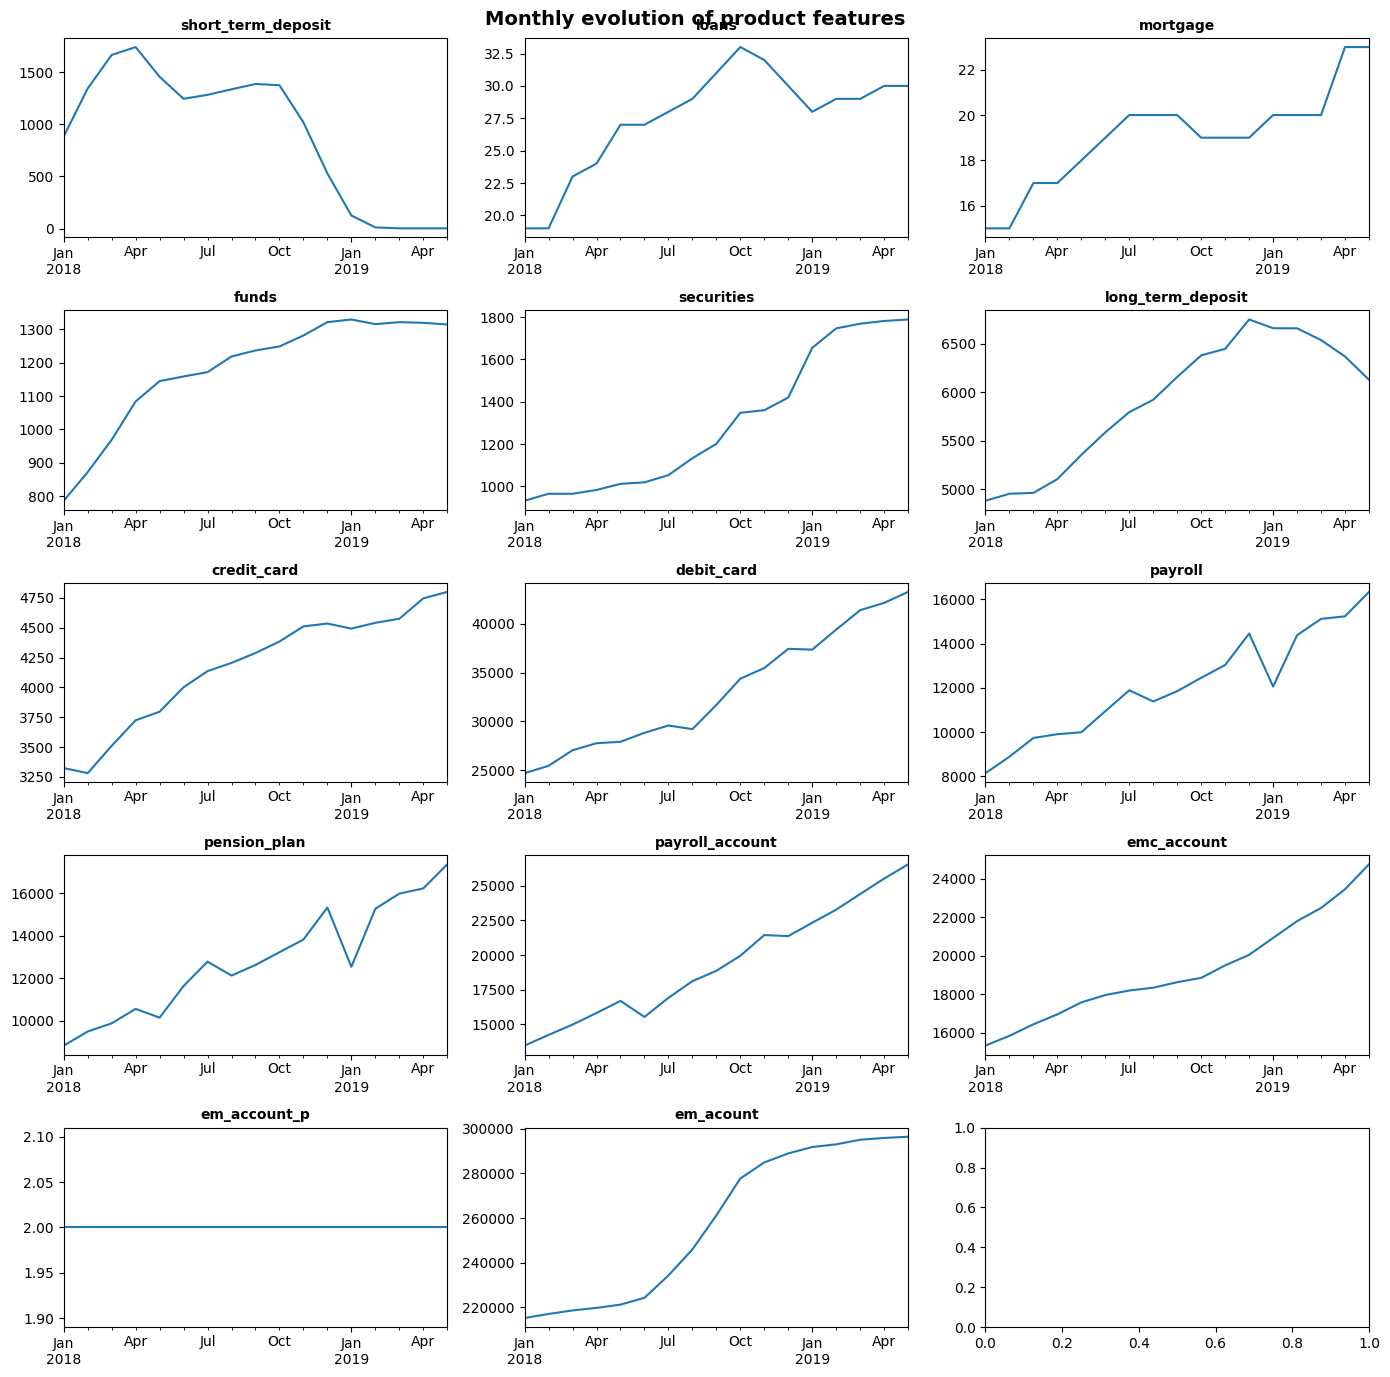

In [ ]:
# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14)) #  
axes = axes.flat

# plot
for i, col in enumerate(products):
    products_df.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Monthly evolution of product features', fontsize = 14, fontweight = 'bold')

In [ ]:
# only by looking at this graph:
# - the product with worst retention is short term deposit: from all the clients we had in early 2018 we have only two in may 2019
# - the rest have better retentions

In [ ]:
df.loc[(df['short_term_deposit']==1)&(df['pk_partition']=='2019-05-28')]

,pk_partition,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,...,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary
5809832,2019-05-28,1090829,1,0,0,0,0,1,0,0,...,2015-10-29,KFC,1.00,02 - PARTICULARES,ES,Sevilla,H,39,N,"134,008.62"
5834085,2019-05-28,1013549,1,0,0,0,0,1,0,1,...,2015-04-25,KAT,1.00,02 - PARTICULARES,ES,Guadalajara,V,62,N,"126,433.47"


In [75]:
df['pk_partition'].min()

'2018-01-28'

In [76]:
check_dates_df = df.loc[df['entry_date']>='2018-01-28'].copy()

In [77]:
check_dates_df.shape

(1202506, 27)

In [79]:
len(check_dates_df['pk_cid'].unique())

151511

In [80]:
check_dates_df.set_index('entry_date', inplace=True)

In [81]:
check_dates_df['pk_partition'].min()

'2018-01-28'

In [83]:
len(check_dates_df.loc[check_dates_df['pk_partition']=='2018-01-28','pk_cid'].unique())

80

In [84]:
check_dates_df.drop_duplicates('pk_cid', inplace=True)

In [87]:
check_dates_df.shape

(151511, 26)

Text(0.5, 0.98, 'Monthly evolution of product features from Entry date')

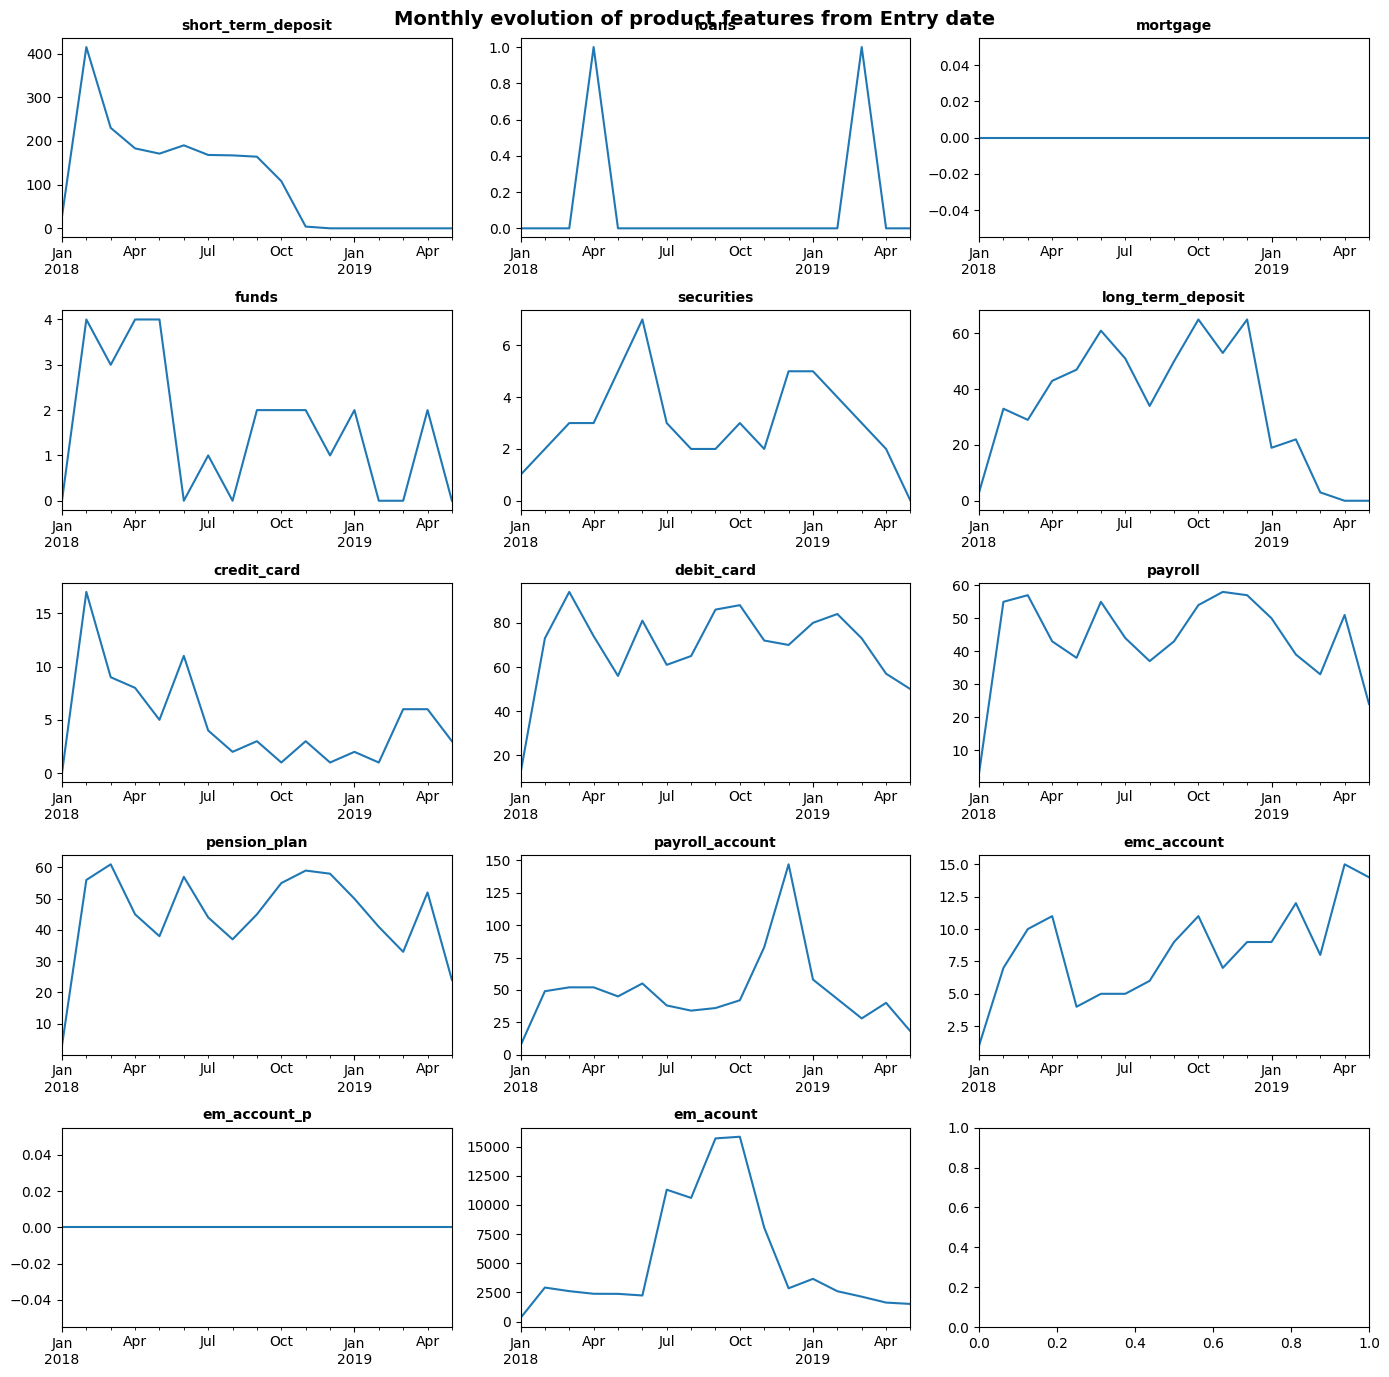

In [86]:
# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14)) #  
axes = axes.flat

# plot
for i, col in enumerate(products):
    check_dates_df.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Monthly evolution of product features from Entry date', fontsize = 14, fontweight = 'bold')